In [11]:
import pandas as pd

import sys
sys.path.append('..') 

from src.eda import (
    plot_features, 
    show_missing, 
    plot_correlation_matrix,
    survival_rate_by_groups,
    train_catboost_and_plot_importance
)

from src.modeling import evaluate_model


# Load data
df = pd.read_csv('../data/train.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


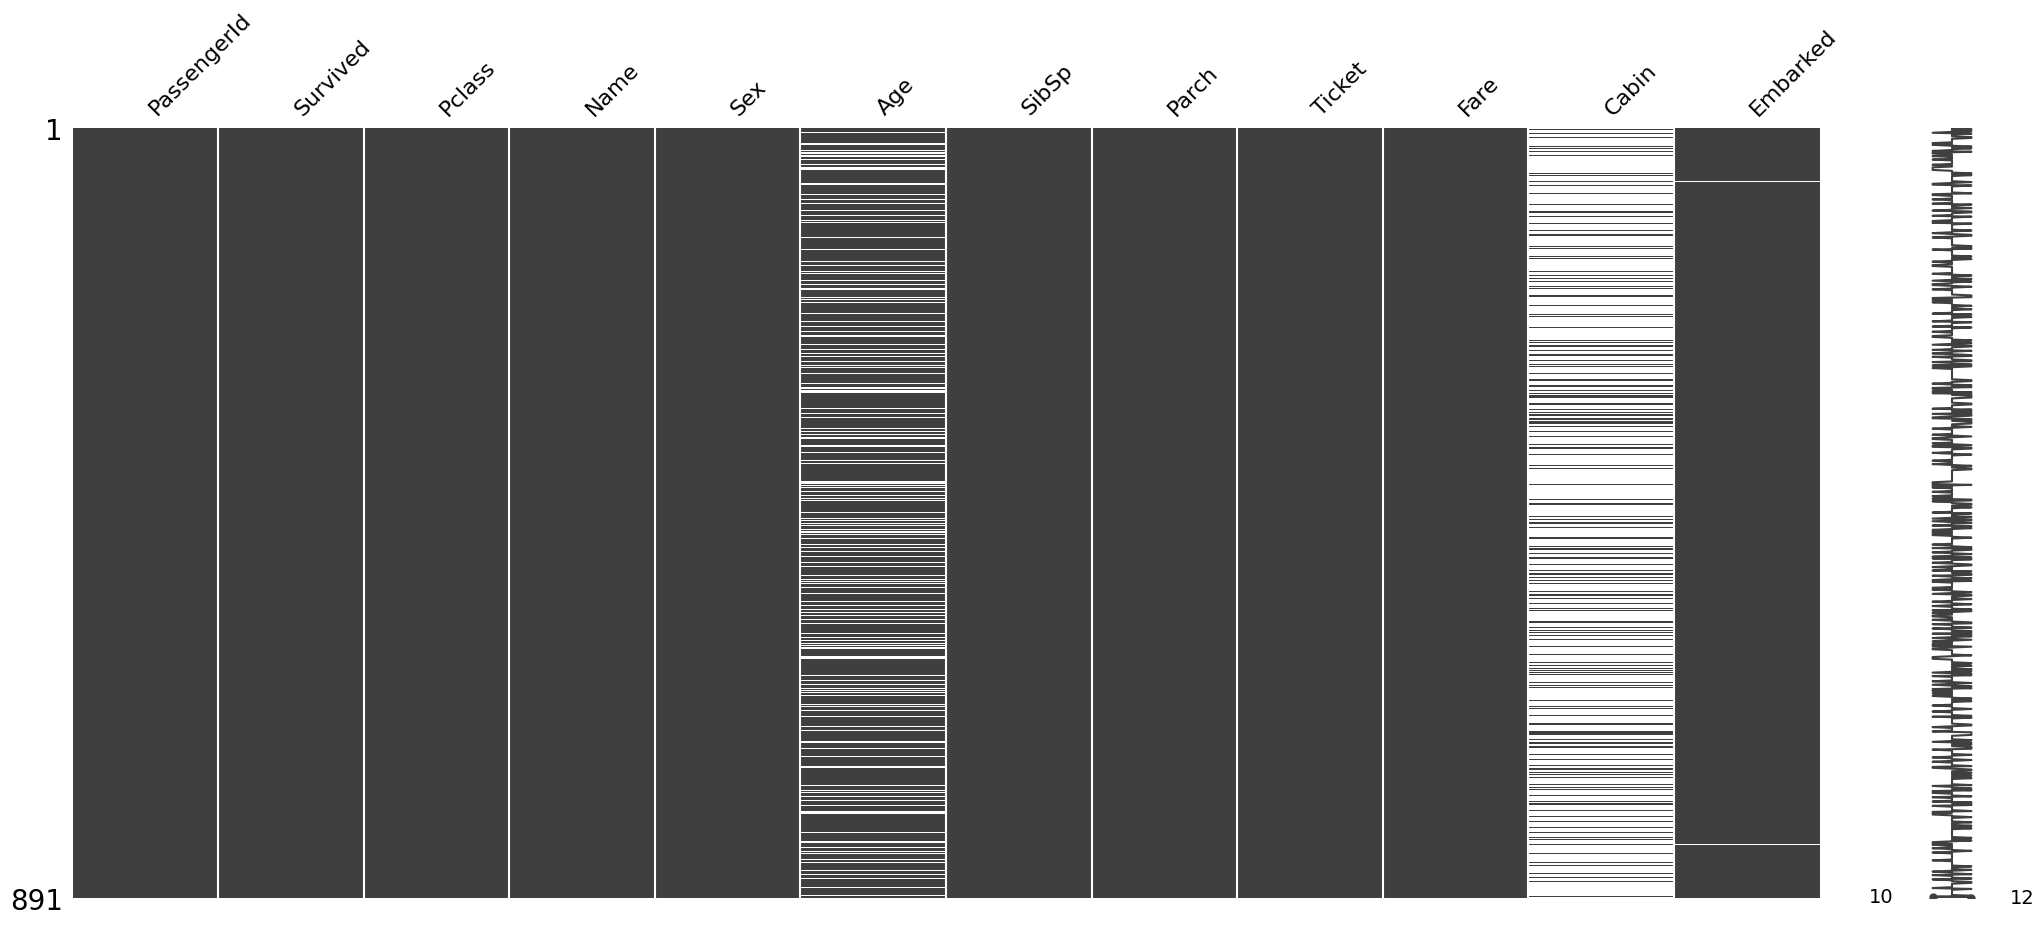

In [12]:
df.info()
df.describe()
df.isnull().sum()
show_missing(df)


In [13]:
df['Survived'] = df['Survived'].astype(int).map({1:'Yes', 0:'No'})
df['Embarked'] = df['Embarked'].map({'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'})
df['Pclass'] = df['Pclass'].astype(str)




📊 Plotting categorical feature: Sex


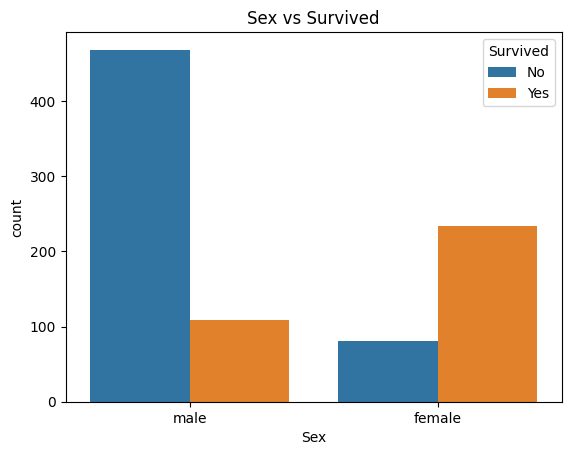

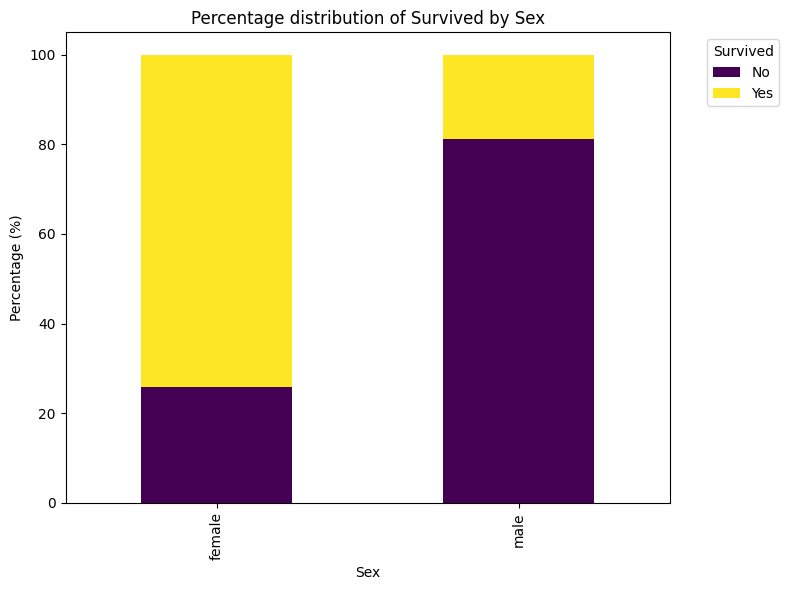

📊 Plotting categorical feature: Pclass


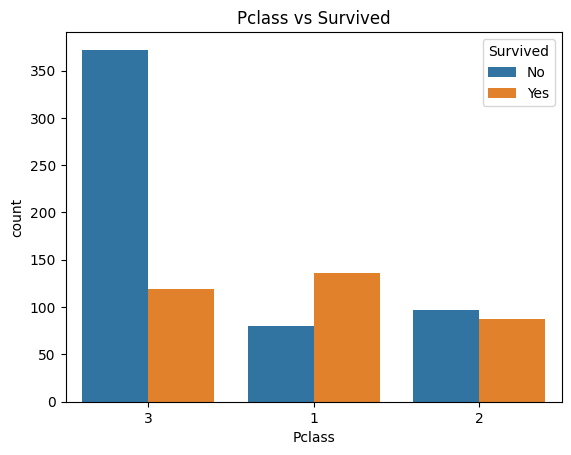

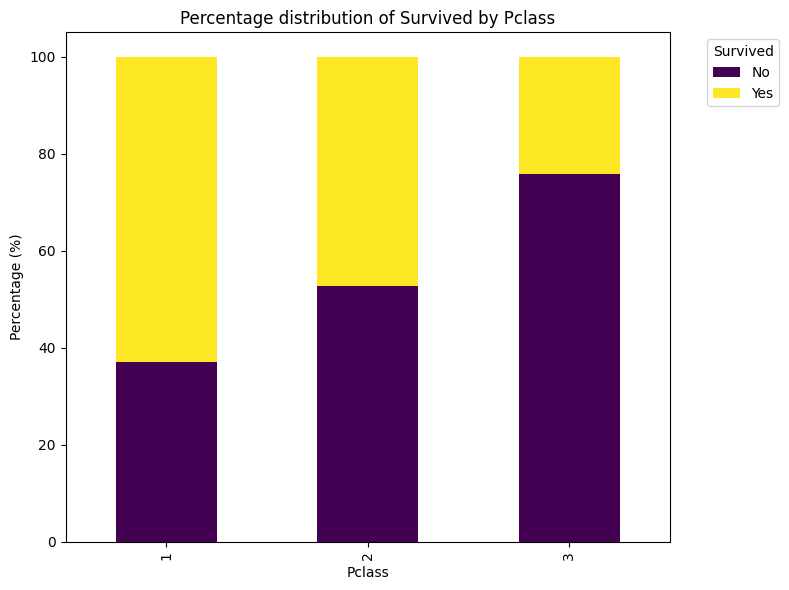

📊 Plotting categorical feature: Embarked


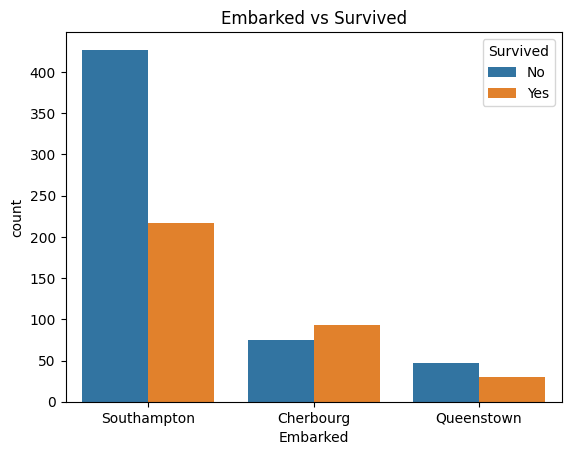

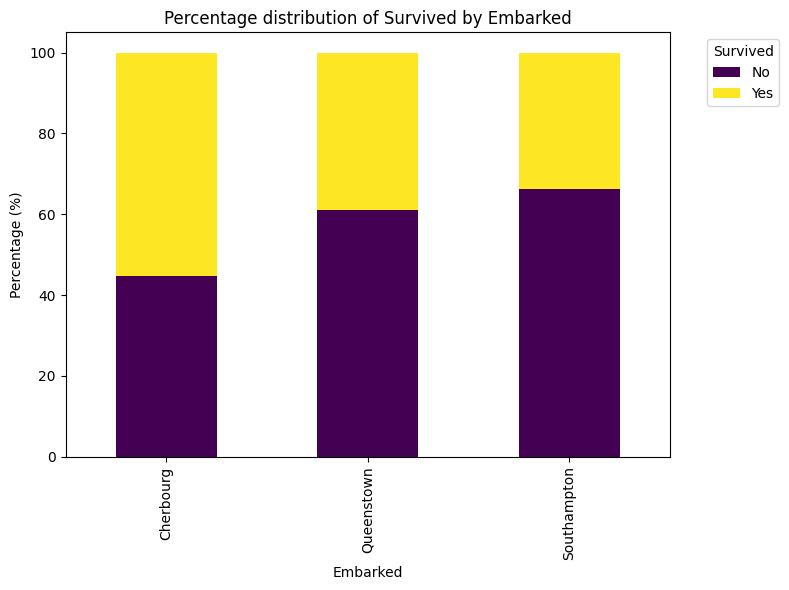

📈 Plotting numerical feature: Age


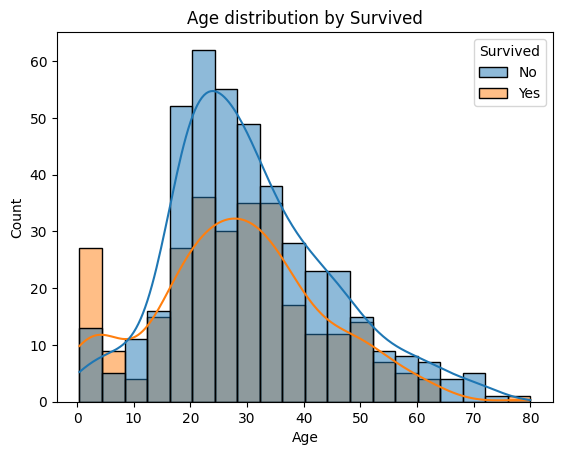

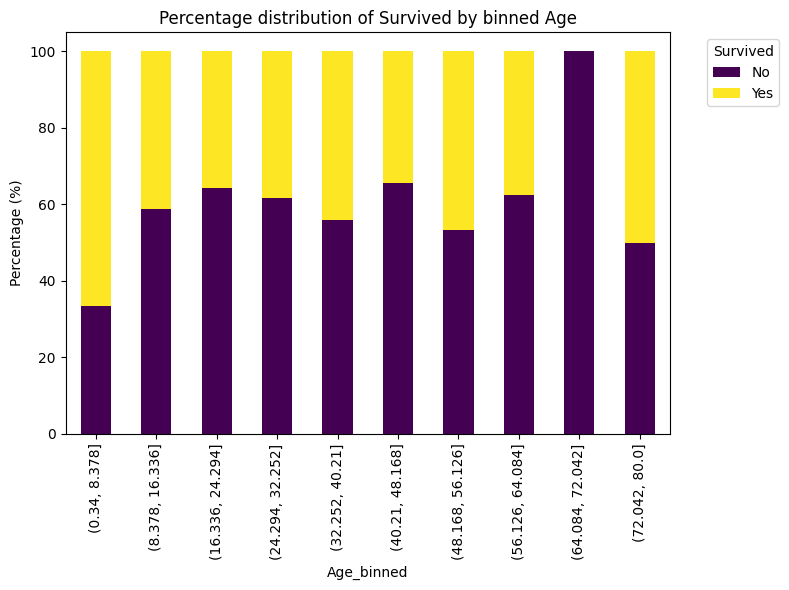

📈 Plotting numerical feature: Fare


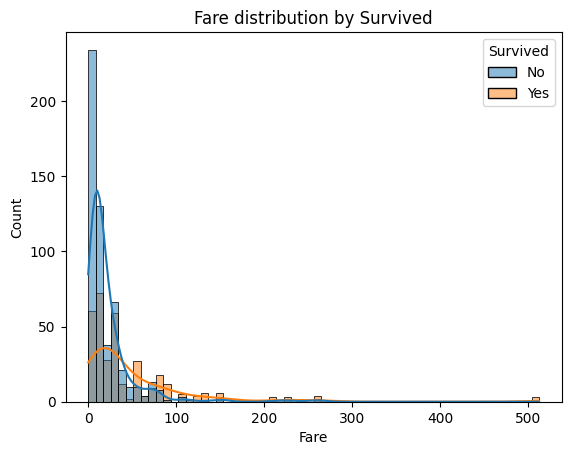

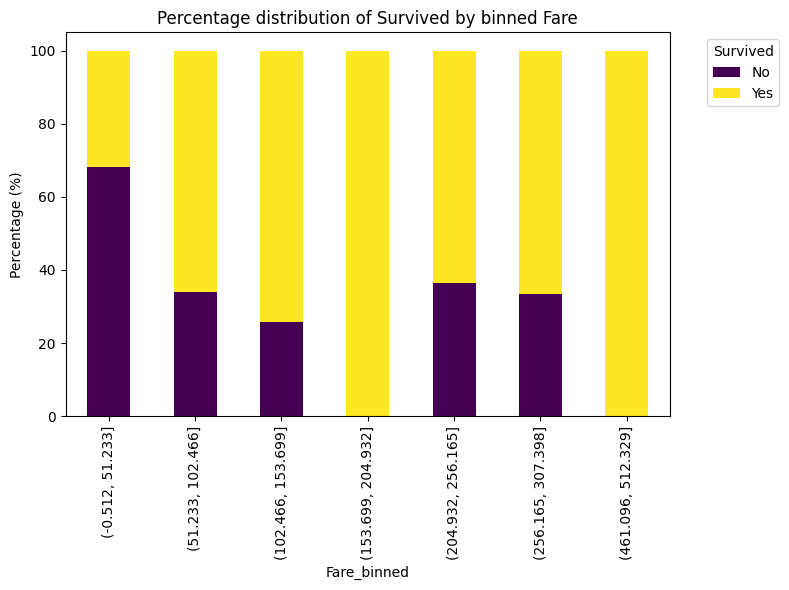

In [14]:
plot_features(df, ['Sex', 'Pclass', 'Embarked', 'Age', 'Fare'], 'Survived')

In [15]:
# plot_decision_tree(df, 'Survived', feature_col=None, max_depth=3, figsize=(10,8))
print(df)

     PassengerId Survived Pclass  \
0              1       No      3   
1              2      Yes      1   
2              3      Yes      3   
3              4      Yes      1   
4              5       No      3   
..           ...      ...    ...   
886          887       No      2   
887          888      Yes      1   
888          889       No      3   
889          890      Yes      1   
890          891       No      3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886           

    Feature  Importance
0       Sex   57.052182
2    Pclass   15.722950
4      Fare    9.669550
3       Age    7.304830
5     SibSp    4.078769
6     Parch    3.830352
1  Embarked    2.341367


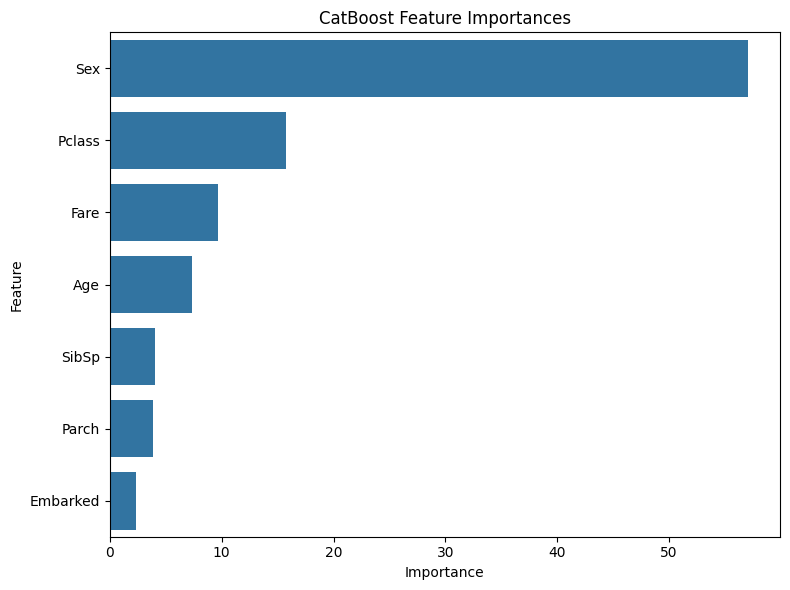

In [16]:
categorical = ['Sex', 'Embarked', 'Pclass']
numerical = ['Age', 'Fare', 'SibSp', 'Parch']

model, importance_df = train_catboost_and_plot_importance(df, 'Survived', categorical, numerical)


In [17]:
df['Survived'] = df['Survived'].map({'Yes': 1, 'No': 0})




      Sex  count  sum  survival_rate
0  female    314  233       0.742038
1    male    577  109       0.188908


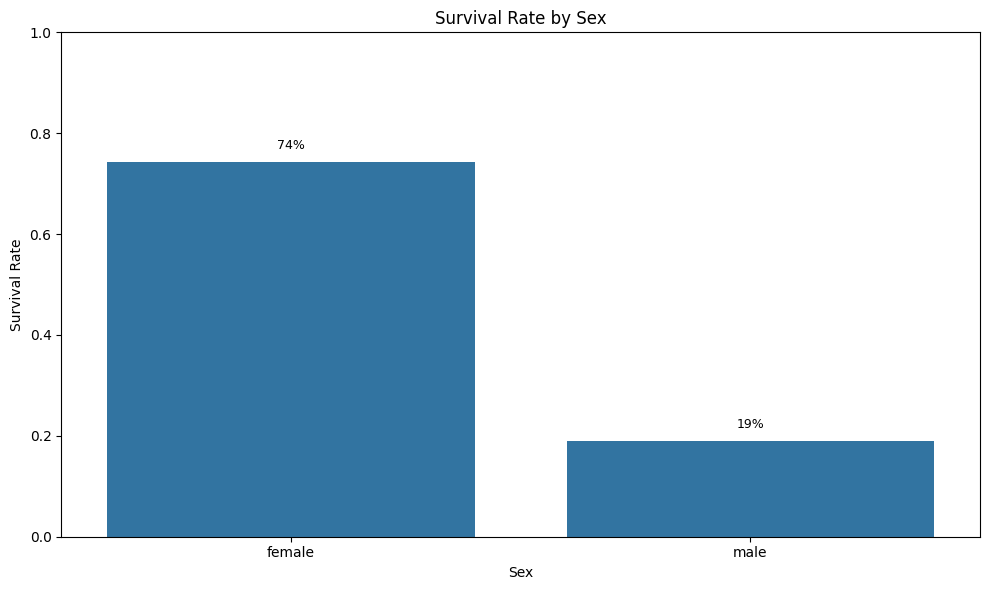

  Pclass  count  sum  survival_rate
0      1    216  136       0.629630
1      2    184   87       0.472826
2      3    491  119       0.242363


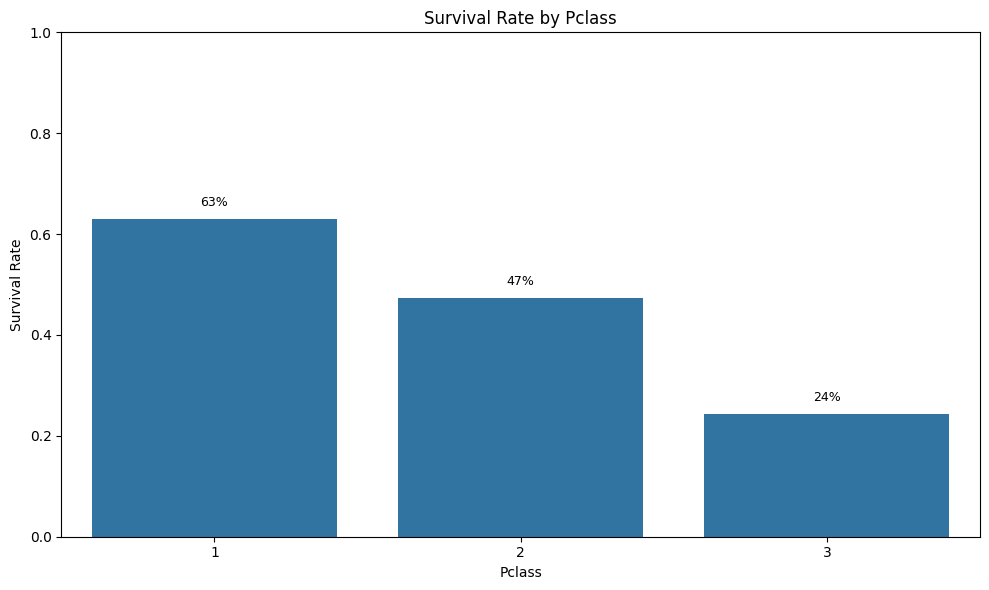

      Embarked  count  sum  survival_rate
0    Cherbourg    168   93       0.553571
1   Queenstown     77   30       0.389610
2  Southampton    644  217       0.336957


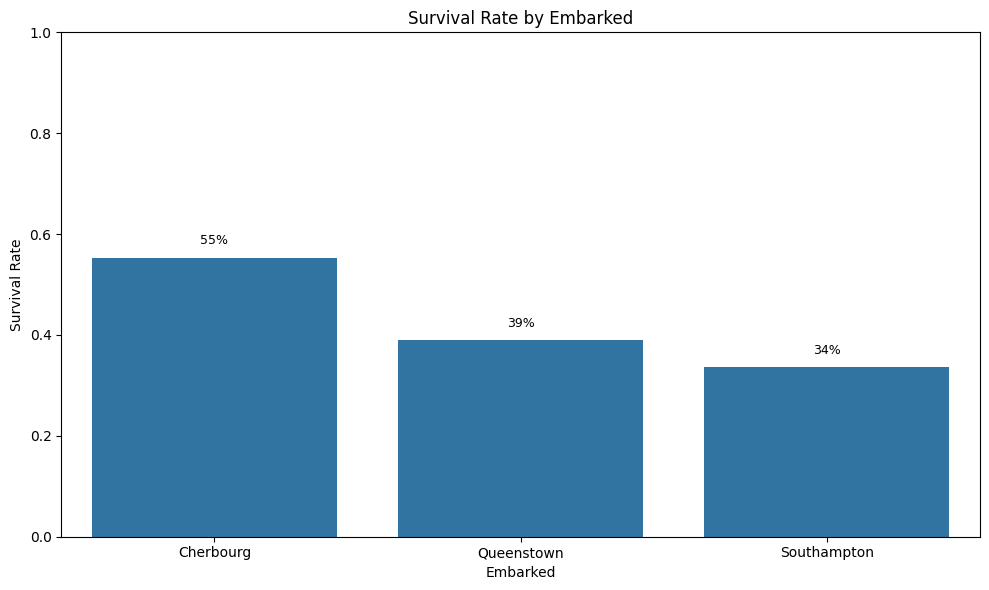

       Age_group  count  sum  survival_rate
0  (0.419, 18.0]    139   70       0.503597
1   (18.0, 23.0]    107   33       0.308411
2   (23.0, 28.0]    116   45       0.387931
3   (28.0, 34.0]    116   48       0.413793
4   (34.0, 44.0]    121   51       0.421488
5   (44.0, 80.0]    115   43       0.373913


c:\Users\zales\Documents\workspace\data science projects\titanic-survival-prediction\notebooks\..\src\eda.py:302: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(group_cols)[target].agg(['count', 'sum']).reset_index()


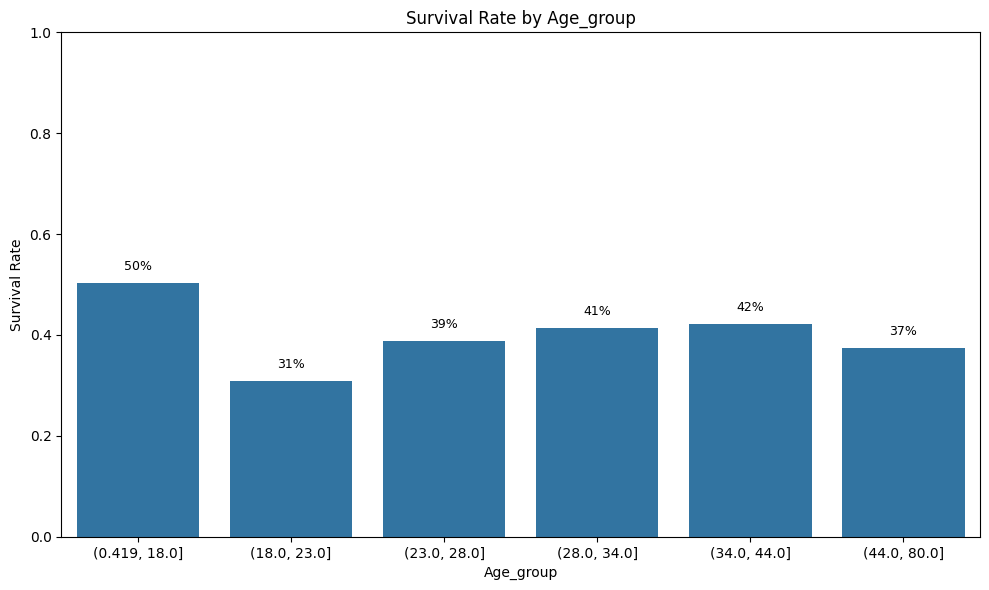

c:\Users\zales\Documents\workspace\data science projects\titanic-survival-prediction\notebooks\..\src\eda.py:302: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(group_cols)[target].agg(['count', 'sum']).reset_index()


        Fare_group  count  sum  survival_rate
0   (-0.001, 7.91]    223   44       0.197309
1   (7.91, 14.454]    224   68       0.303571
2   (14.454, 31.0]    222  101       0.454955
3  (31.0, 512.329]    222  129       0.581081


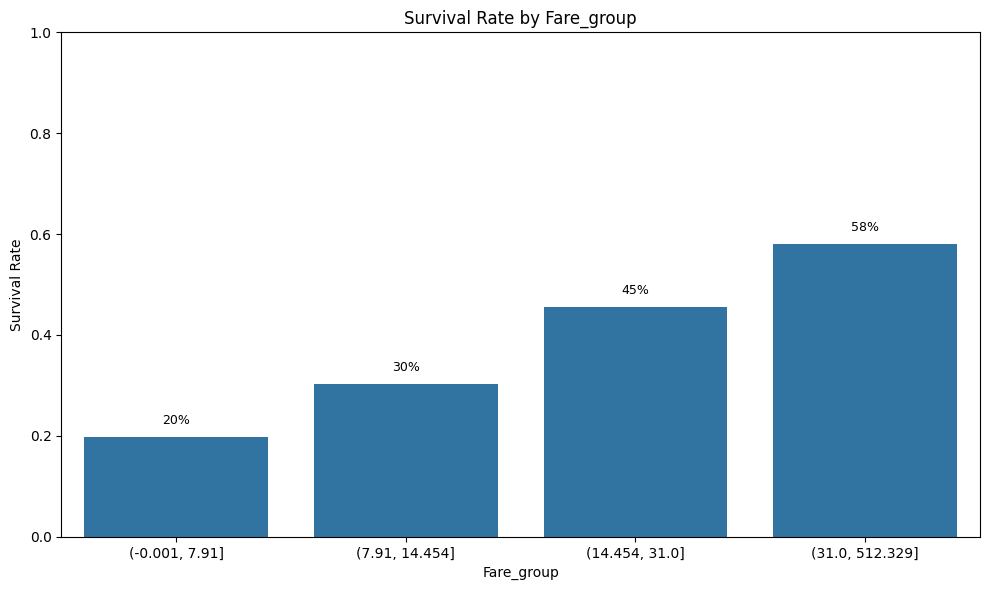

,Fare_group,count,sum,survival_rate
0,"(-0.001, 7.91]",223,44,0.197309
1,"(7.91, 14.454]",224,68,0.303571
2,"(14.454, 31.0]",222,101,0.454955
3,"(31.0, 512.329]",222,129,0.581081


In [18]:
# # Categorical
survival_rate_by_groups(df, group_cols=['Sex'])
survival_rate_by_groups(df, group_cols=['Pclass'])
survival_rate_by_groups(df, group_cols=['Embarked'])

# # Numerical (binned)
survival_rate_by_groups(df, group_cols=['Age'], bin_col='Age', bins=6, bin_method='qcut')
survival_rate_by_groups(df, group_cols=['Fare'], bin_col='Fare', bins=4, bin_method='qcut')

c:\Users\zales\Documents\workspace\data science projects\titanic-survival-prediction\notebooks\..\src\eda.py:302: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(group_cols)[target].agg(['count', 'sum']).reset_index()


  Age_group  count  sum  survival_rate
0     Child     68   39       0.573529
1      Teen     96   40       0.416667
2       20s    220   77       0.350000
3       30s    167   73       0.437126
4     40–59    137   54       0.394161
5       60+     25    6       0.240000


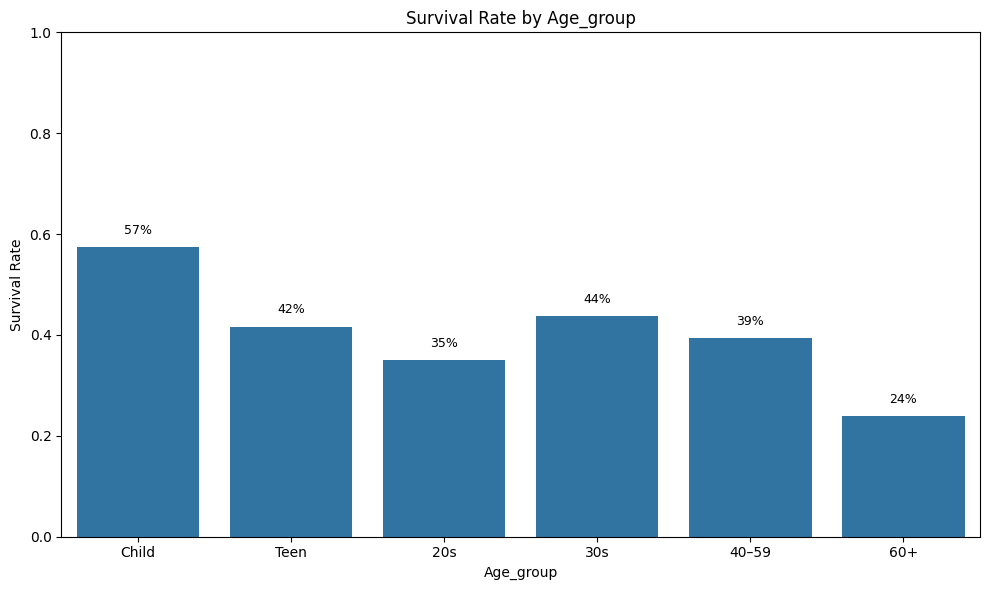

,Age_group,count,sum,survival_rate
0,Child,68,39,0.573529
1,Teen,96,40,0.416667
2,20s,220,77,0.350000
3,30s,167,73,0.437126
4,40–59,137,54,0.394161
5,60+,25,6,0.240000


In [19]:
bins = [0, 12, 20, 30, 40, 60, 80]
labels = ['Child', 'Teen', '20s', '30s', '40–59', '60+']
df['Age_group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

survival_rate_by_groups(df, group_cols=['Age_group'])

c:\Users\zales\Documents\workspace\data science projects\titanic-survival-prediction\notebooks\..\src\eda.py:302: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(group_cols)[target].agg(['count', 'sum']).reset_index()


   Age_group Pclass  count  sum  survival_rate
0      Child      1      4    3       0.750000
1      Child      2     17   17       1.000000
2      Child      3     47   19       0.404255
3       Teen      1     17   14       0.823529
4       Teen      2     18    9       0.500000
5       Teen      3     61   17       0.278689
6        20s      1     34   24       0.705882
7        20s      2     53   22       0.415094
8        20s      3    133   31       0.233083
9        30s      1     50   39       0.780000
10       30s      2     48   19       0.395833
11       30s      3     69   15       0.217391
12     40–59      1     64   37       0.578125
13     40–59      2     33   15       0.454545
14     40–59      3     40    2       0.050000
15       60+      1     16    4       0.250000
16       60+      2      4    1       0.250000
17       60+      3      5    1       0.200000


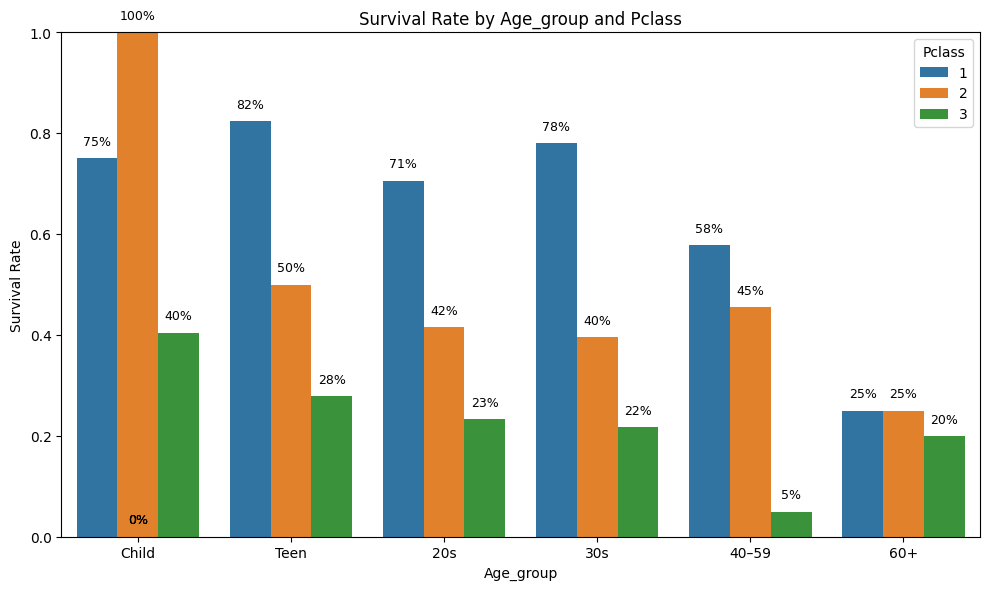

,Age_group,Pclass,count,sum,survival_rate
0,Child,1,4,3,0.750000
1,Child,2,17,17,1.000000
2,Child,3,47,19,0.404255
3,Teen,1,17,14,0.823529
4,Teen,2,18,9,0.500000
5,Teen,3,61,17,0.278689
6,20s,1,34,24,0.705882
7,20s,2,53,22,0.415094
8,20s,3,133,31,0.233083
9,30s,1,50,39,0.780000


In [20]:
survival_rate_by_groups(df, group_cols=['Age_group', 'Pclass'])


c:\Users\zales\Documents\workspace\data science projects\titanic-survival-prediction\notebooks\..\src\eda.py:302: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(group_cols)[target].agg(['count', 'sum']).reset_index()


   Age_group     Sex  count  sum  survival_rate
0      Child  female     32   19       0.593750
1      Child    male     36   20       0.555556
2       Teen  female     43   34       0.790698
3       Teen    male     53    6       0.113208
4        20s  female     72   52       0.722222
5        20s    male    148   25       0.168919
6        30s  female     60   50       0.833333
7        30s    male    107   23       0.214953
8      40–59  female     50   38       0.760000
9      40–59    male     87   16       0.183908
10       60+  female      4    4       1.000000
11       60+    male     21    2       0.095238


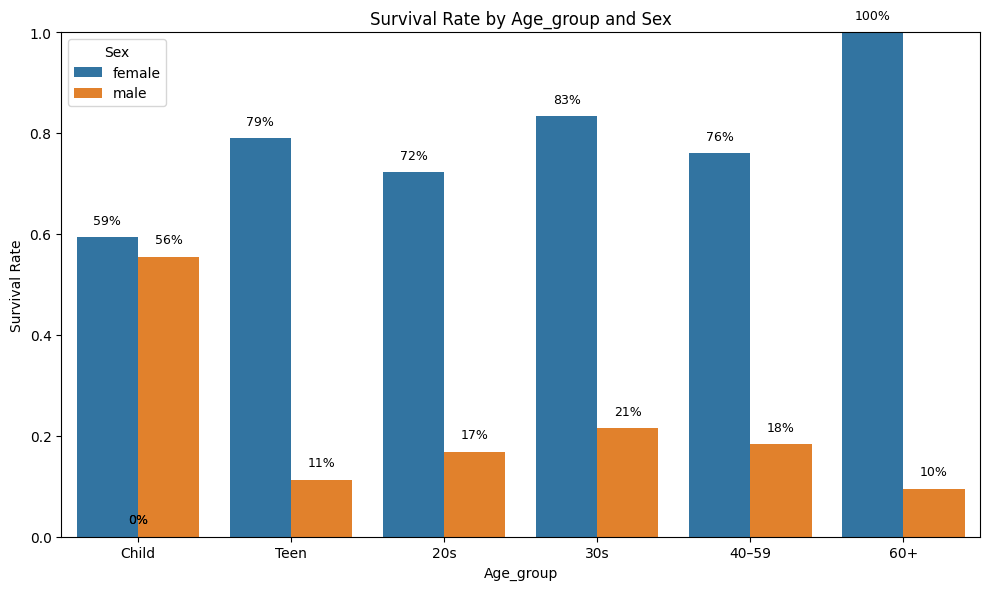

c:\Users\zales\Documents\workspace\data science projects\titanic-survival-prediction\notebooks\..\src\eda.py:302: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(group_cols)[target].agg(['count', 'sum']).reset_index()


   Age_group Sex_Pclass  count  sum  survival_rate
0      Child   female_1      1    0       0.000000
1      Child   female_2      8    8       1.000000
2      Child   female_3     23   11       0.478261
3      Child     male_1      3    3       1.000000
4      Child     male_2      9    9       1.000000
5      Child     male_3     24    8       0.333333
6       Teen   female_1     13   13       1.000000
7       Teen   female_2      8    8       1.000000
8       Teen   female_3     22   13       0.590909
9       Teen     male_1      4    1       0.250000
10      Teen     male_2     10    1       0.100000
11      Teen     male_3     39    4       0.102564
12       20s   female_1     16   15       0.937500
13       20s   female_2     25   22       0.880000
14       20s   female_3     31   15       0.483871
15       20s     male_1     18    9       0.500000
16       20s     male_2     28    0       0.000000
17       20s     male_3    102   16       0.156863
18       30s   female_1     27 

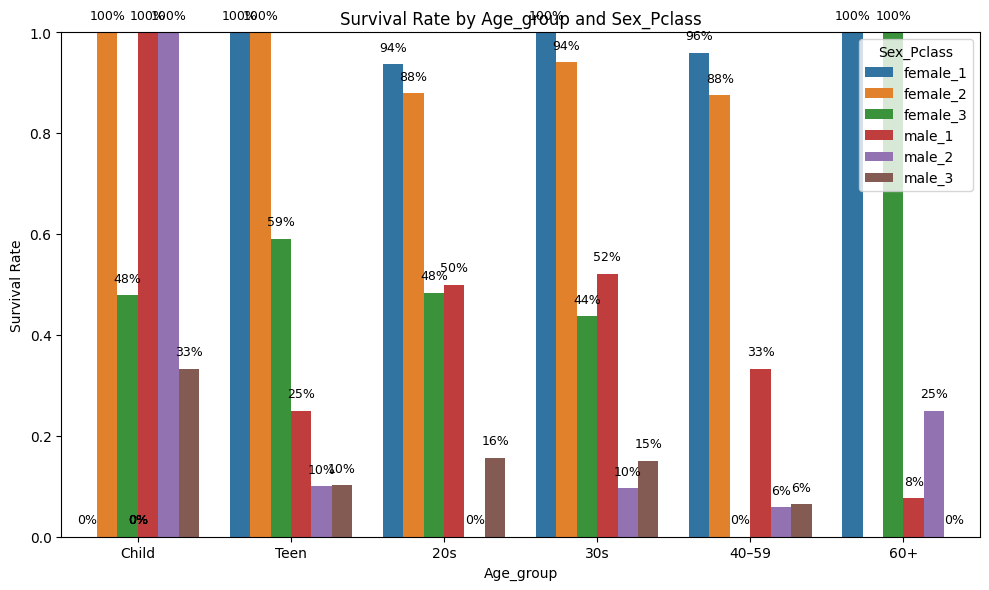

,Age_group,Sex_Pclass,count,sum,survival_rate
0,Child,female_1,1,0,0.000000
1,Child,female_2,8,8,1.000000
2,Child,female_3,23,11,0.478261
3,Child,male_1,3,3,1.000000
4,Child,male_2,9,9,1.000000
5,Child,male_3,24,8,0.333333
6,Teen,female_1,13,13,1.000000
7,Teen,female_2,8,8,1.000000
8,Teen,female_3,22,13,0.590909
9,Teen,male_1,4,1,0.250000


In [21]:
survival_rate_by_groups(df, group_cols=['Age_group', 'Sex'])
df['Sex_Pclass'] = df['Sex'].astype(str) + '_' + df['Pclass'].astype(str)
survival_rate_by_groups(df, group_cols=['Age_group', 'Sex_Pclass'])

c:\Users\zales\Documents\workspace\data science projects\titanic-survival-prediction\notebooks\..\src\eda.py:302: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(group_cols)[target].agg(['count', 'sum']).reset_index()


   Age_group Pclass  count  sum  survival_rate
0      Child      1      1    0       0.000000
1      Child      2      8    8       1.000000
2      Child      3     23   11       0.478261
3       Teen      1     13   13       1.000000
4       Teen      2      8    8       1.000000
5       Teen      3     22   13       0.590909
6        20s      1     16   15       0.937500
7        20s      2     25   22       0.880000
8        20s      3     31   15       0.483871
9        30s      1     27   27       1.000000
10       30s      2     17   16       0.941176
11       30s      3     16    7       0.437500
12     40–59      1     25   24       0.960000
13     40–59      2     16   14       0.875000
14     40–59      3      9    0       0.000000
15       60+      1      3    3       1.000000
16       60+      2      0    0            NaN
17       60+      3      1    1       1.000000


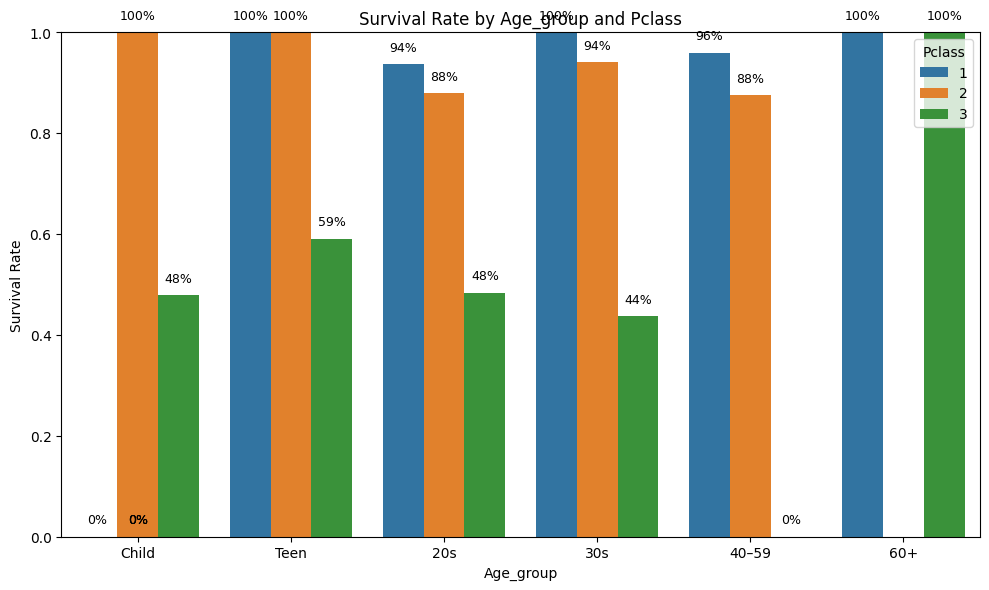

c:\Users\zales\Documents\workspace\data science projects\titanic-survival-prediction\notebooks\..\src\eda.py:302: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(group_cols)[target].agg(['count', 'sum']).reset_index()


   Age_group Pclass  count  sum  survival_rate
0      Child      1      3    3       1.000000
1      Child      2      9    9       1.000000
2      Child      3     24    8       0.333333
3       Teen      1      4    1       0.250000
4       Teen      2     10    1       0.100000
5       Teen      3     39    4       0.102564
6        20s      1     18    9       0.500000
7        20s      2     28    0       0.000000
8        20s      3    102   16       0.156863
9        30s      1     23   12       0.521739
10       30s      2     31    3       0.096774
11       30s      3     53    8       0.150943
12     40–59      1     39   13       0.333333
13     40–59      2     17    1       0.058824
14     40–59      3     31    2       0.064516
15       60+      1     13    1       0.076923
16       60+      2      4    1       0.250000
17       60+      3      4    0       0.000000


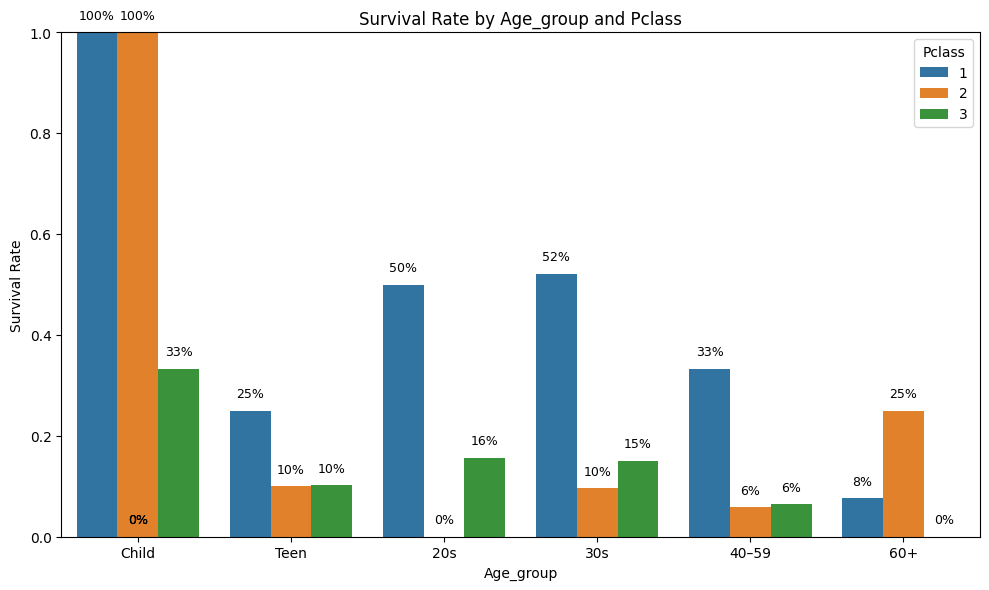

,Age_group,Pclass,count,sum,survival_rate
0,Child,1,3,3,1.000000
1,Child,2,9,9,1.000000
2,Child,3,24,8,0.333333
3,Teen,1,4,1,0.250000
4,Teen,2,10,1,0.100000
5,Teen,3,39,4,0.102564
6,20s,1,18,9,0.500000
7,20s,2,28,0,0.000000
8,20s,3,102,16,0.156863
9,30s,1,23,12,0.521739


In [22]:
# One for females
survival_rate_by_groups(
    df[df['Sex'] == 'female'],
    group_cols=['Age_group', 'Pclass'],
    plot=True
)

# One for males
survival_rate_by_groups(
    df[df['Sex'] == 'male'],
    group_cols=['Age_group', 'Pclass'],
    plot=True
)


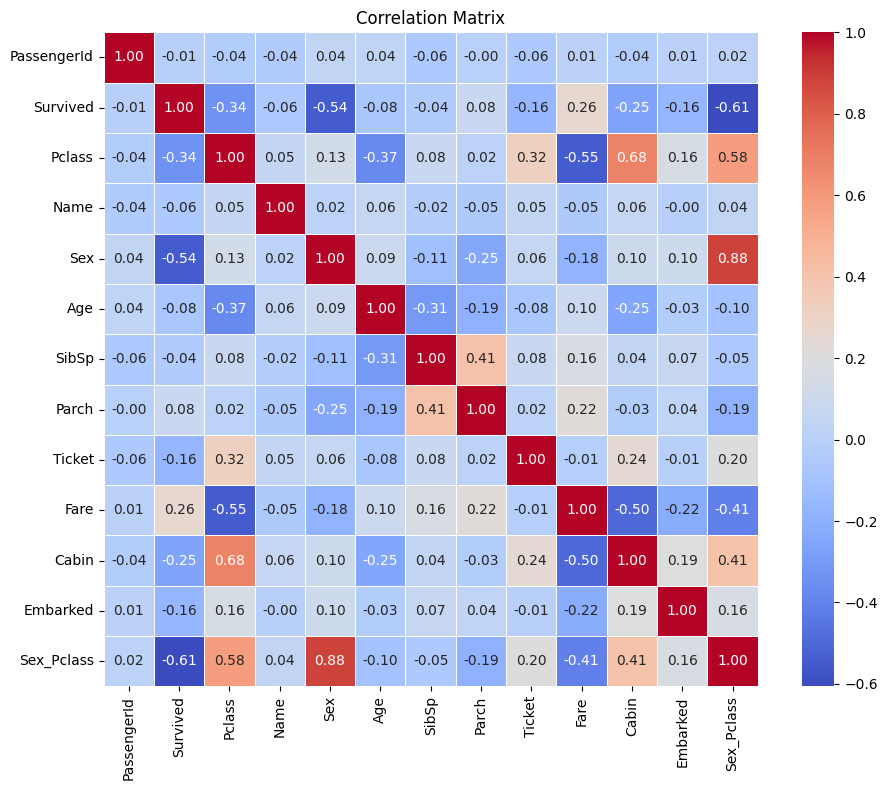

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.036847,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083,0.018367
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.077221,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517,-0.606044
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.369226,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112,0.584971
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.062583,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557,0.041824
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.093254,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057,0.881126
Age,0.036847,-0.077221,-0.369226,0.062583,0.093254,1.000000,-0.308247,-0.189119,-0.075934,0.096067,-0.252331,-0.025252,-0.098115
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.308247,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654,-0.054157
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.189119,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322,-0.192062
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.075934,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041,0.201172
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096067,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226,-0.411324


In [23]:
plot_correlation_matrix(df)